In [ ]:
Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the
dataset have?
Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
distribution.
Q3. What is the range of prices in the dataset? What is the minimum and maximum price?
Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different
airlines.
Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how
they may impact your analysis.
Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset
to identify the peak travel season. What features would you analyze to identify the peak season, and how
would you present your findings to your boss?
Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight
Price dataset to identify any trends in flight prices. What features would you analyze to identify these
trends, and what visualizations would you use to present your findings to your team?
Q8. You are a data scientist working for an airline company, and you have been asked to analyze the
Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to
identify these factors, and how would you present your findings to the management team?

In [2]:
# Q1
#importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
df=pd.read_excel('flight_price.xlsx')
df.head()
df.shape
df['Date']=df['Date_of_Journey'].str.split('/').str[0].astype(int)
df['Month']=df['Date_of_Journey'].str.split('/').str[1].astype(int)
df['Year']=df['Date_of_Journey'].str.split('/').str[2].astype(int)
df.drop('Date_of_Journey',axis=1,inplace=True)
df['Arrival_hours']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0].astype(int)
df['Arrival_min']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1].astype(int)
df.drop('Arrival_Time',axis=1,inplace=True)
df.drop('Route',axis=1,inplace=True)
df['Duration_hours']=df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df['Duration_mins']=df['Duration'].str.split(' ').str[1].str.split('m').str[0]
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Dep_Time         10683 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Date             10683 non-null  int64 
 9   Month            10683 non-null  int64 
 10  Year             10683 non-null  int64 
 11  Arrival_hours    10683 non-null  int64 
 12  Arrival_min      10683 non-null  int64 
 13  Duration_hours   10683 non-null  object
 14  Duration_mins    9651 non-null   object
dtypes: int64(6), object(9)
memory usage: 1.2+ MB


,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10,2,50
1,Air India,Kolkata,Banglore,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15,7,25
2,Jet Airways,Delhi,Cochin,09:25,19h,2 stops,No info,13882,9,6,2019,4,25,19,NaN
3,IndiGo,Kolkata,Banglore,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30,5,25
4,IndiGo,Banglore,New Delhi,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35,4,45
5,SpiceJet,Kolkata,Banglore,09:00,2h 25m,non-stop,No info,3873,24,6,2019,11,25,2,25
6,Jet Airways,Banglore,New Delhi,18:55,15h 30m,1 stop,In-flight meal not included,11087,12,3,2019,10,25,15,30
7,Jet Airways,Banglore,New Delhi,08:00,21h 5m,1 stop,No info,22270,1,3,2019,5,5,21,5
8,Jet Airways,Banglore,New Delhi,08:55,25h 30m,1 stop,In-flight meal not included,11087,12,3,2019,10,25,25,30
9,Multiple carriers,Delhi,Cochin,11:25,7h 50m,1 stop,No info,8625,27,5,2019,19,15,7,50


<AxesSubplot: xlabel='Price', ylabel='Count'>

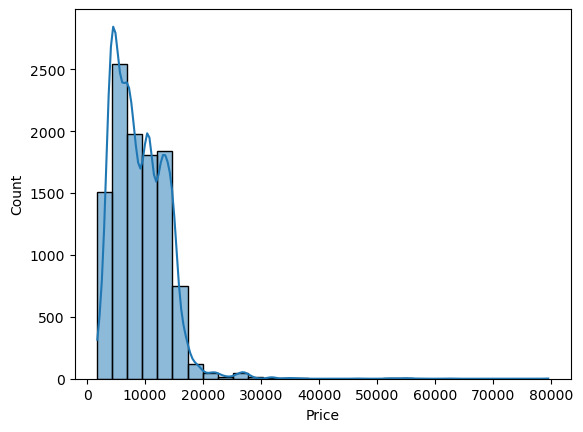

In [4]:
# Q2
sns.histplot(data=df,x='Price',bins=30,kde=True)

In [8]:
# Q3
max=df['Price'].max()
min=df['Price'].min()
min,max

(1759, 79512)

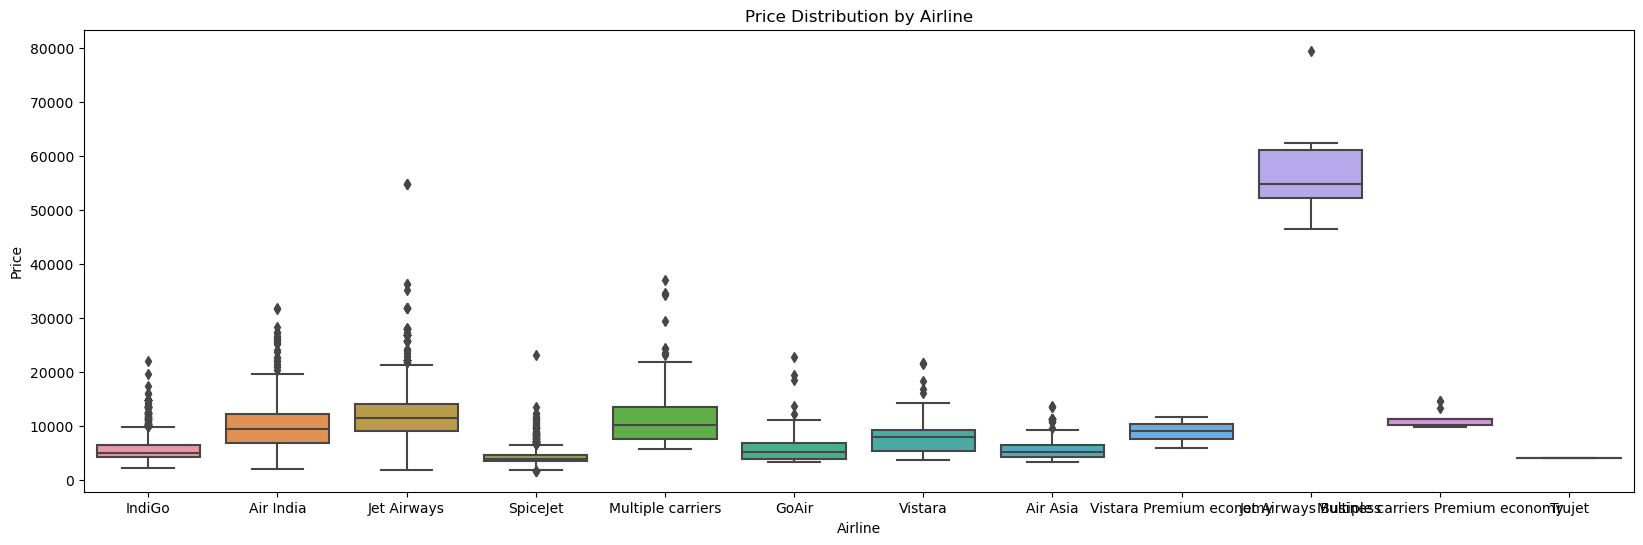

In [5]:
# Q4
# Create a boxplot of flight prices by airline
airlines=df['Airline'].unique()
plt.figure(figsize=(20, 6))
sns.boxplot(x='Airline', y='Price', data=df[df['Airline'].isin(airlines)])
plt.title('Price Distribution by Airline')
plt.show()

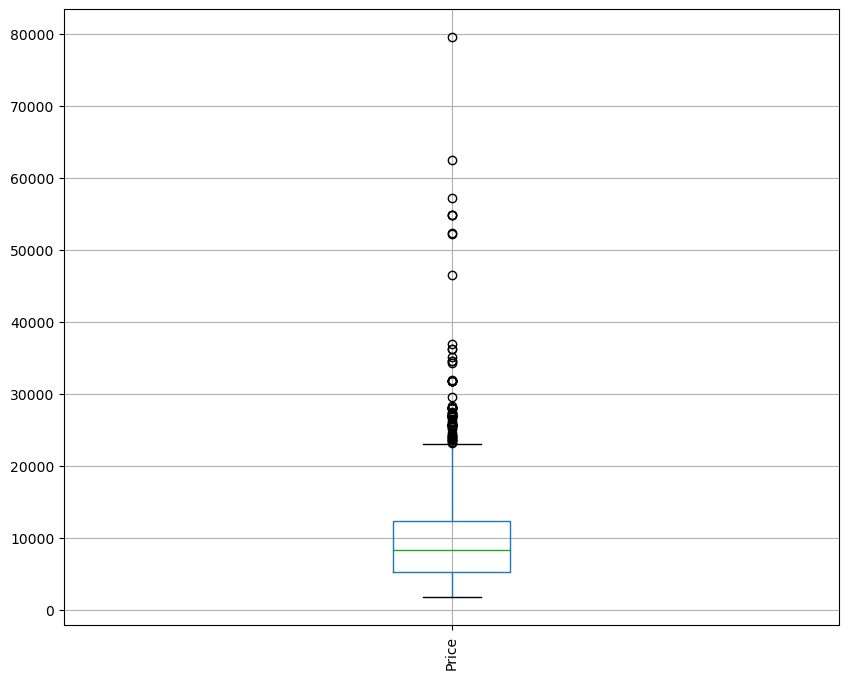

In [9]:
# Q5
plt.figure(figsize=(10, 8))
df.boxplot()
plt.xticks(rotation=90)
plt.show()
To identify potential outliers, we can look for data points that fall outside of the whiskers in the boxplot. These points may be considered outliers and should be further 
investigated to determine if they are legitimate or errors in the data.

Potential outliers can impact our analysis by skewing our results and affecting our statistical tests and models. It is important to identify and address outliers in our
data analysis to ensure accurate and reliable results

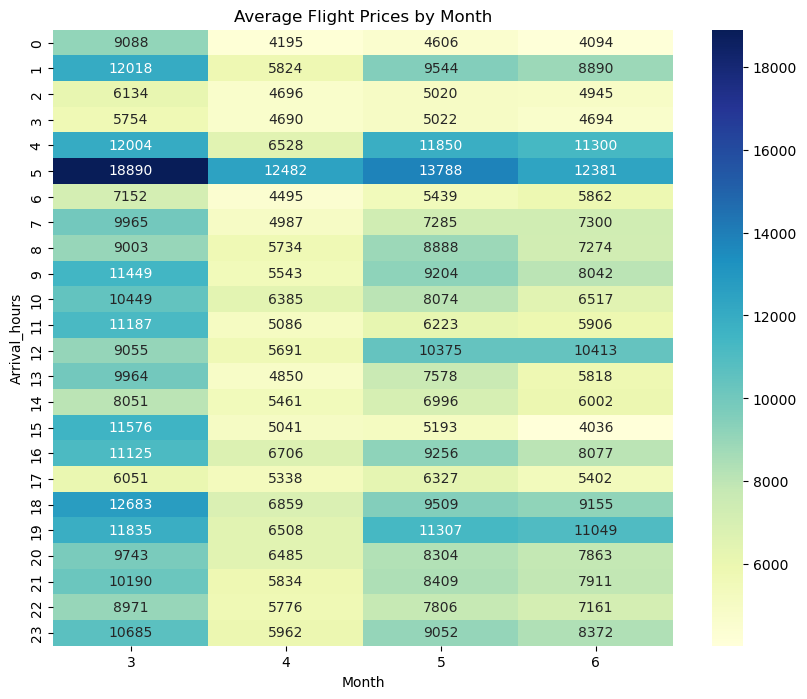

In [23]:
# Q6
# To identify the peak travel season from the Flight Price dataset, I would analyze the following features:

# Date: Analyze flight prices over a period of time to identify trends and patterns.
# Destination: Look for popular destinations and when they have the highest demand.
# Flight duration: Analyze how flight prices change during the duration of the flight.
# Day of the week: Analyze flight prices based on the day of the week to identify any trends.
# To present my findings to my boss, I would create a visual representation of the data using graphs and charts. For example, I would create a line chart that shows the average 
# flight prices over time, highlighting the peak travel season(s) with different colors. I would also create a bar chart that shows the most popular destinations and the times 
# when they have the highest demand. Additionally, I would create a scatterplot that shows the relationship between flight duration and price. Finally, I would analyze the data 
# based on the day of the week and create a heat map to show the days when the flight prices are the highest or lowest.

# Overall, I would provide a detailed analysis with visual representations to help my boss make informed decisions about the peak travel season.
flight_heatmap = df.pivot_table(index='Arrival_hours', columns='Month', values='Price', aggfunc='mean')
plt.figure(figsize=(10, 8))
sns.heatmap(flight_heatmap, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title("Average Flight Prices by Month")
plt.show()

In [ ]:
# Q7
To identify trends in flight prices, I would analyze the following features:

Month of the year: This feature will help identify if there are any seasonal trends in flight prices.

Departure and arrival location: This feature will help identify if there are any specific routes or destinations that have consistently high or low flight prices.

Flight duration: This feature will help identify if there are any specific periods during the day or week when flight prices are higher or lower.

Airline: This feature will help identify if there are any specific airlines that charge higher or lower prices.

To present my findings to the team, I would use the following visualizations:

Line chart: A line chart can be used to visualize the trend in flight prices over time (i.e. by month). This will help identify any seasonal trends in flight prices.

Bar chart: A bar chart can be used to compare the average flight prices for different departure and arrival locations, airlines, or flight duration. This will help identify 
any significant differences in flight prices based on these features.

Box and whisker plot: A box and whisker plot can be used to identify any outliers in the data and compare the distribution of flight prices for different features such as 
departure and arrival locations or airlines.

Heatmap: A heatmap can be used to identify any patterns in flight prices based on multiple features, such as departure location, month of the year, and airline.

By using these visualizations and analyzing the relevant features, we can identify trends in flight prices and provide insights to the team for better decision-making.

In [ ]:
# Q8
To identify the factors that affect flight prices, I would analyze the following features:

Departure and arrival location: This feature will help identify if there are any specific routes or destinations that have higher or lower flight prices.

Month of the year: This feature will help identify if there are any seasonal trends in flight prices.

Flight duration: This feature will help identify if there are any specific periods during the day or week when flight prices are higher or lower.

Airline: This feature will help identify if there are any specific airlines that charge higher or lower prices.

Number of stops: This feature will help identify if flights with more stops are priced differently than direct flights.

To present my findings to the management team, I would use the following steps:

Conduct exploratory data analysis to understand the distribution of flight prices for each feature.

Use statistical tests such as ANOVA or t-tests to identify if there are significant differences in flight prices based on each feature.

Create a summary table that lists each feature along with the average flight price for each level of that feature (e.g. average flight price for each airline).

Create a regression model to identify which features have the greatest impact on flight prices. This will allow us to estimate the effect of each feature on flight prices 
while controlling for the other factors.

Use visualizations such as scatter plots, bar charts, or line charts to present our findings to the management team. For example, we could create a scatter plot that shows 
the relationship between flight duration and price, or a bar chart that shows the average flight price for each departure location.

By using these steps and analyzing the relevant features, we can identify the factors that affect flight prices and provide insights to the management team for
better decision-making.

Google Playstore:

In [57]:
# Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does
# the dataset have?
# ans:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()
df.shape

(10841, 13)

<AxesSubplot: title={'center': 'Rating'}, xlabel='Category'>

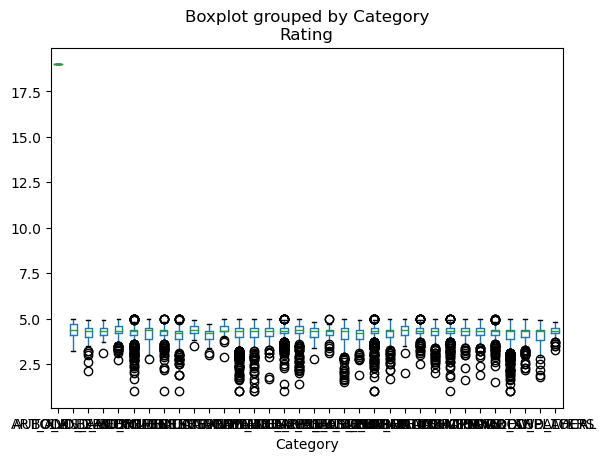

In [38]:
# Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different
# app categories.
median_rating = df['Rating'].median()
df['Rating'].fillna(median_rating, inplace=True)
df.boxplot(by ='Category', column =['Rating'], grid = False)

In [39]:
# Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may
# impact your analysis.
df.isnull().sum()
# This will give us the count of missing values in each column. Based on the output, we can identify that there are missing values in the Rating, Type, Content Rating, Current Var
# and Android Ver columns.

# Missing values can impact our analysis in several ways. For example, if there are a large number of missing values in a particular column, it may not be possible to 
# use that column in our analysis. In addition, if the missing values are not handled properly, they can skew our results and lead to incorrect conclusions. Therefore, it is
# important to handle missing values appropriately, which may include imputing missing values or removing rows with missing values.

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

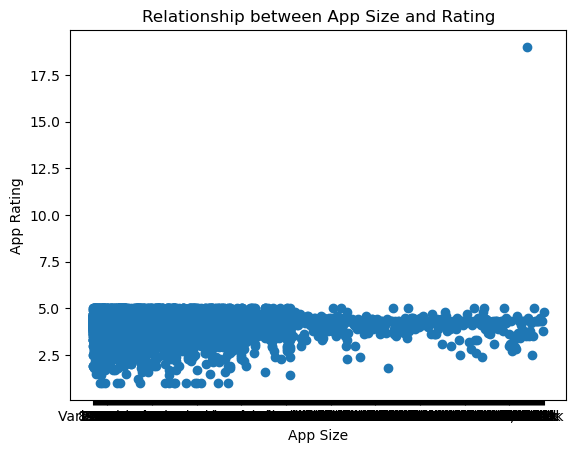

In [40]:
# Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize
# the relationship.

plt.scatter(df['Size'], df['Rating'])
plt.xlabel('App Size')
plt.ylabel('App Rating')
plt.title('Relationship between App Size and Rating')
plt.show()

In [ ]:
# Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.
# Group the data by app type and calculate the mean price
df.dropna(subset=['Type', 'Price'], inplace=True)
app_type_prices = df.groupby('Type')['Price'].mean()

# Create a bar chart of the average prices by app type
plt.bar(app_type_prices.index, app_type_prices.values)
plt.xlabel('App Type')
plt.ylabel('Average Price')
plt.title('Average Price of Apps by Type')
plt.show()

In [56]:
# Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps
# with the highest number of installs.
# Create a frequency table of the App column
app_freq = df['App'].value_counts()

# Print the top 10 most popular apps by number of installs
print(app_freq[:10])
df.info()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
8 Ball Pool                                           7
slither.io                                            6
Bubble Shooter                                        6
Zombie Catchers                                       6
Bleacher Report: sports news, scores, & highlights    6
Name: App, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  

/tmp/ipykernel_70/1409105029.py:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[cols]=df[cols].str.replace(item,'')


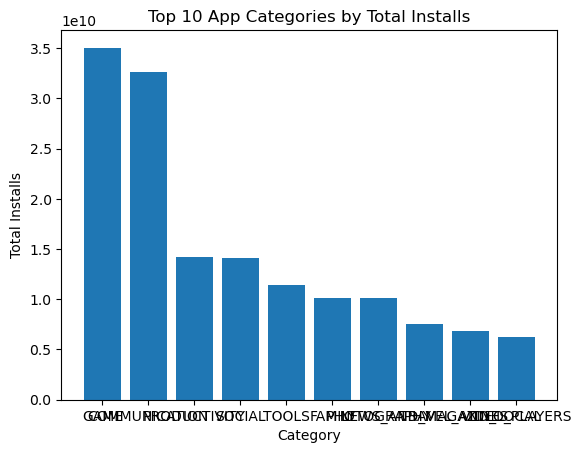

In [62]:
# Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the
# Google Playstore dataset to identify the most popular app categories. How would you approach this
# task, and what features would you analyze to make recommendations to the company?
# ans:
# To identify the most popular app categories in the Google Playstore dataset, we can analyze the Category feature and the Installs feature. Here's how we can approach this task:

# Filter the dataset to include only apps that have a large number of installs. We can use a threshold value (e.g., 1 million installs) to identify popular apps.

# Compute the total number of installs for each app category. We can group the dataset by category and sum the installs to get the total number of installs for each category.

# Sort the categories by the total number of installs and identify the top categories. We can create a bar chart or a table to visualize the results and make recommendations to
# the company
df=df.drop(df.index[10472])
chars_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in chars_to_remove:
    for cols in cols_to_clean:
        df[cols]=df[cols].str.replace(item,'')
        
df['Installs'].unique()
df['Installs']=df['Installs'].astype('int')
popular_apps = df[df['Installs'] >= 1000000]

# # Compute the total number of installs for each app category
category_installs = popular_apps.groupby('Category')['Installs'].sum()

# Sort the categories by the total number of installs and identify the top categories
top_categories = category_installs.sort_values(ascending=False)[:10]

# Create a bar chart of the total number of installs by category
plt.bar(top_categories.index, top_categories.values)
plt.xlabel('Category')
plt.ylabel('Total Installs')
plt.title('Top 10 App Categories by Total Installs')
plt.show()
# This will create a bar chart of the total number of installs by category for the top 10 categories. From the bar chart, we can see the most popular app categories and make 
# recommendations to the company based on these findings.

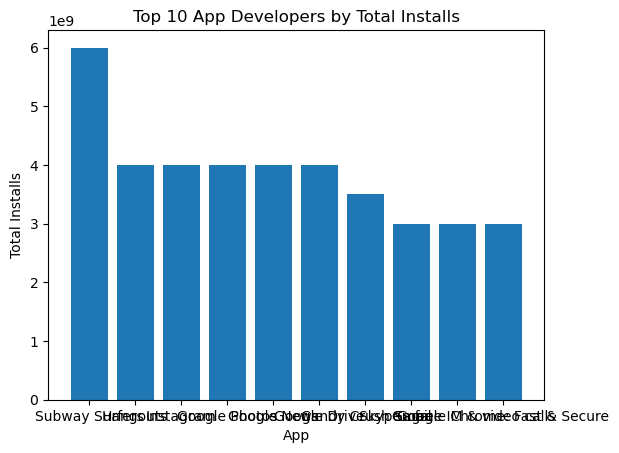

In [ ]:
# Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the
# most successful app developers. What features would you analyze to make recommendations to the
# company, and what data visualizations would you use to present your findings?
# ans:
# To identify the most successful app developers in the Google Playstore dataset, we can analyze the following features:

# App Developer: The name of the app developer who created the app.
# Category: The category of the app.
# Installs: The number of installs of the app.
# Rating: The rating of the app.
# To make recommendations to the company, we can group the dataset by app developer and category, and then compute metrics such as the total number of installs and the average 
# rating for each developer-category combination. We can also compute other metrics such as the number of apps developed by each developer and the average price of the apps.

# We can use data visualizations such as bar charts and scatter plots to present our findings. Here are some examples of data visualizations we can create:

# Bar chart of the total number of installs by developer: This visualization will help us identify the most successful app developers in terms of total number of installs.

# Scatter plot of the average rating vs. average number of installs by developer-category combination: This visualization will help us identify the most successful app developers 
# in terms of both rating and installs.

# Stacked bar chart of the number of apps developed by each developer by category: This visualization will help us identify the categories in which each developer has the most 
# experience
# Compute the total number of installs by developer
installs_by_dev = df.groupby('App')['Installs'].sum().sort_values(ascending=False)[:10]

# Create a bar chart of the total number of installs by developer
plt.bar(installs_by_dev.index, installs_by_dev.values)
plt.xlabel('App')
plt.ylabel('Total Installs')
plt.title('Top 10 App Developers by Total Installs')
plt.show()

# Compute the average rating and average number of installs by developer-category combination
ratings_installs_by_dev_cat = df.groupby(['App', 'Category']).agg({'Rating': 'mean', 'Installs': 'mean'}).reset_index()

# Create a scatter plot of the average rating vs. average number of installs by developer-category combination
sns.scatterplot(data=ratings_installs_by_dev_cat, x='Rating', y='Installs', hue='App')
plt.xlabel('Average Rating')
plt.ylabel('Average Installs')
plt.title('App Developers by Rating and Installs')
plt.show()

# Compute the number of apps developed by each developer by category
apps_by_dev_cat = df.groupby(['App', 'Category']).size().unstack(fill_value=0).sort_values(by='ART_AND_DESIGN', ascending=False)[:10]

# Create a stacked bar chart of the number of apps developed by each developer by category
apps_by_dev_cat.plot(kind='bar', stacked=True)
plt.xlabel('App')
plt.ylabel('Number of Apps')
plt.title('Top 10 App Developers by Category')
plt.show()


In [ ]:
Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to
launch a new app. What features would you analyze to make recommendations to the company, and
what data visualizations would you use to present your findings?
ans:
To identify the best time to launch a new app, we can analyze the following features:

Number of installs: We can analyze the number of installs during different times of the year to see if there is a pattern or a particular time when more apps are downloaded.

Rating: We can analyze the ratings of the top apps during different times of the year to see if there is a pattern or a particular time when more highly rated apps are 
downloaded.

Reviews: We can analyze the number of reviews during different times of the year to see if there is a pattern or a particular time when more users leave reviews for apps.

Category: We can analyze the category of the top apps during different times of the year to see if there is a pattern or a particular category that is more popular during a 
certain time.

To present our findings, we can use data visualizations such as line charts, bar charts, and heatmaps. We can create a line chart to show the trend of app downloads, ratings, 
and reviews over time. We can also create a bar chart to show the most popular app categories during different times of the year. Additionally, we can create a heatmap to show 
the busiest times of the year for app downloads, ratings, and reviews.